In [18]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv("Data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("Data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
value_fear = test_data["Fare"].mean()

In [7]:
value_age_train = test_data["Age"].mean()
value_age_test = test_data["Age"].mean()

In [25]:
#Asegurarse de que las columnas de tipo object sean inferidas y convertidas al tipo adecuado
test_data["Fare"] = test_data["Fare"].infer_objects() 

In [9]:
train_data["Age"] = train_data["Age"].fillna(value_age_train)

In [10]:
test_data["Age"] = test_data["Age"].fillna(value_age_test)
test_data["Fare"] = test_data["Fare"].fillna(value_fear)

In [11]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Embarked"]
X = pd.get_dummies(train_data[features], columns=["Sex", "Embarked"])
X_test = pd.get_dummies(test_data[features], columns=["Sex", "Embarked"])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [12]:
prediccions = pd.read_csv("submission.csv")
prediccions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


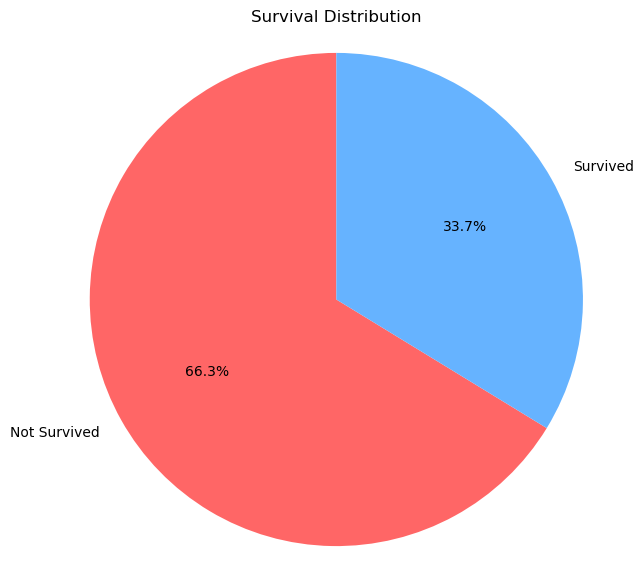

In [22]:
df = pd.DataFrame(prediccions)

survived_counts = df['Survived'].value_counts()

colors = ['#ff6666', '#66b3ff'] 

plt.figure(figsize=(7, 7))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Survival Distribution')
plt.axis('equal')  
plt.show()


In [14]:
test_data['Survived'] = predictions
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


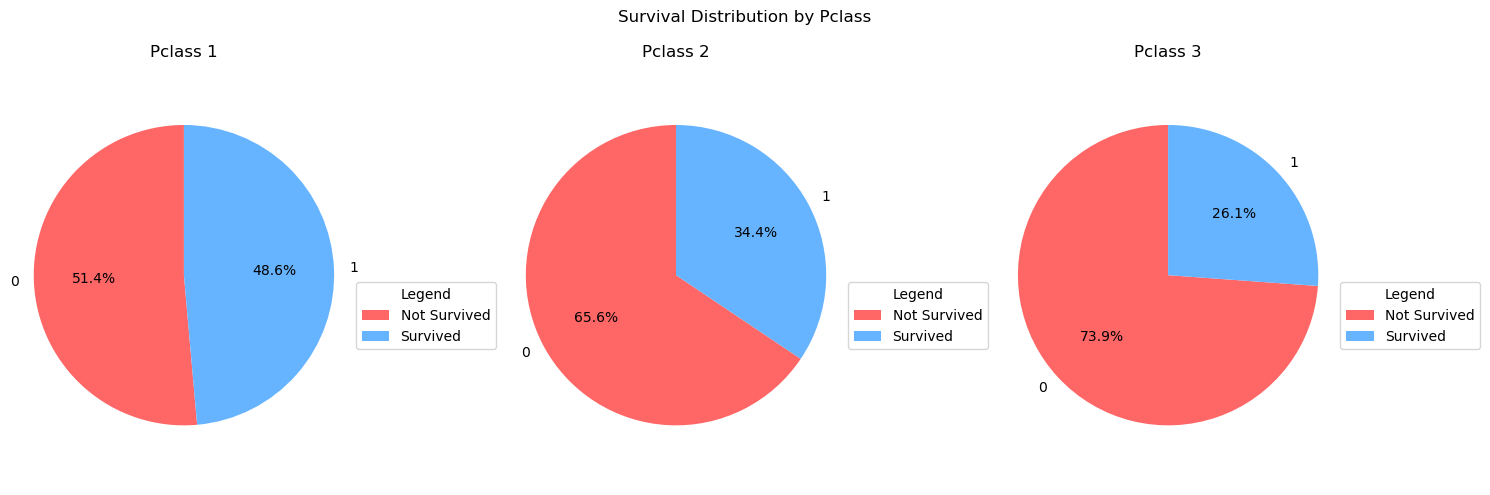

In [26]:
# Agrupar los datos por 'Pclass' y 'Survived', luego contar las ocurrencias
grouped = test_data.groupby(['Pclass', 'Survived']).size().unstack()

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
fig.suptitle('Survival Distribution by Pclass')

colors = ['#ff6666', '#66b3ff'] 

for i, pclass in enumerate([1, 2, 3]):
    ax = axes[i]
    survival_data = grouped.loc[pclass] 
    
    wedges, texts, autotexts = ax.pie(survival_data, labels=survival_data.index, autopct='%1.1f%%', startangle=90, colors=colors)
    
    ax.set_title(f'Pclass {pclass}')
    ax.axis('equal')
    
    ax.legend(wedges, ['Not Survived', 'Survived'], title="Legend", loc="upper left", bbox_to_anchor=(1, 0.5))

plt.tight_layout() 
plt.show()


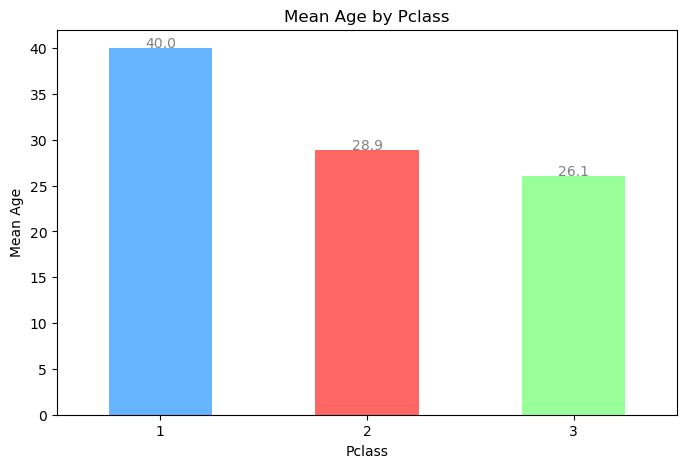

In [17]:
grouped_age = test_data.groupby('Pclass')['Age'].mean()

plt.figure(figsize=(8, 5))
grouped_age.plot(kind='bar', color=['#66b3ff', '#ff6666', '#99ff99'])

plt.title('Mean Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Mean Age')
plt.xticks(rotation=0)  

for i, value in enumerate(grouped_age):
    plt.text(i, value + 0.5, f'{value:.1f}', ha='center', va='center', fontsize=10, color='gray')


plt.show()